In [2]:
import sys
sys.path.append(sys.path[0][:sys.path[0].find('DVML-P7') + len('DVML-P7')])
from Code.UtilityFunctions.get_data_path import get_path
import pandas as pd

In [3]:
yelp_wiki_category_mappings = pd.read_csv(get_path('yelp_wiki_schema_triples_df.csv'))

In [4]:
df = yelp_wiki_category_mappings[['schema_or_yelp_category', 'qid', 'qid_label']].drop_duplicates()

In [5]:
df

,schema_or_yelp_category,qid,qid_label
0,Restaurant,Q11707,restaurant
4,Food,Q2095,food
6,Retail,Q126793,retail
7,Service,Q44127,server
8,DaySpa,NaN,NaN
...,...,...,...
1999,Roman,Q922334,Faletes
2003,DuiSchool,NaN,NaN
2004,PatentLaw,NaN,NaN
2005,HousingCooperative,Q562166,housing cooperative


In [6]:
df['schema_or_yelp_category'].unique().shape

(1240,)

In [7]:
yelp_wiki_category_mappings['schema_or_yelp_category'].unique().shape

(1240,)

In [8]:
yelp_wiki_category_mappings.groupby('qid_label').count().sort_values('qid', ascending=False)

,category,occurences,split_category,SchemaType,schema_or_yelp_category,qid,category_qid,subclassOf,subclassOf_label
qid_label,,,,,,,,,
motorcycle,25,25,25,25,25,25,25,25,25
ski resort,25,25,25,25,25,25,25,25,25
park,25,25,25,25,25,25,25,25,25
dentist,21,21,21,21,21,21,21,21,21
car dealership,21,21,21,21,21,21,21,21,21
...,...,...,...,...,...,...,...,...,...
fondue,1,1,1,0,1,1,1,1,1
fishing,1,1,1,0,1,1,1,1,1
fertility,1,1,1,0,1,1,1,1,1


Text(0, 0.5, 'count')

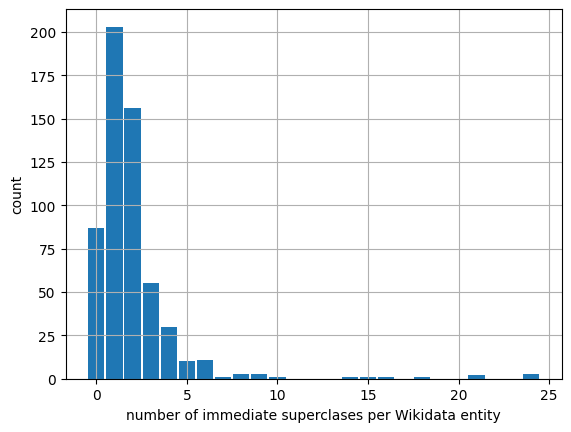

In [22]:
data = yelp_wiki_category_mappings.groupby('qid_label').count().sort_values('qid', ascending=False)['subclassOf'].hist(bins=25, alpha=1, align='left', rwidth=0.9)
data.set_xlabel("number of immediate superclases per Wikidata entity")
data.set_ylabel("count")

Text(0, 0.5, 'count')

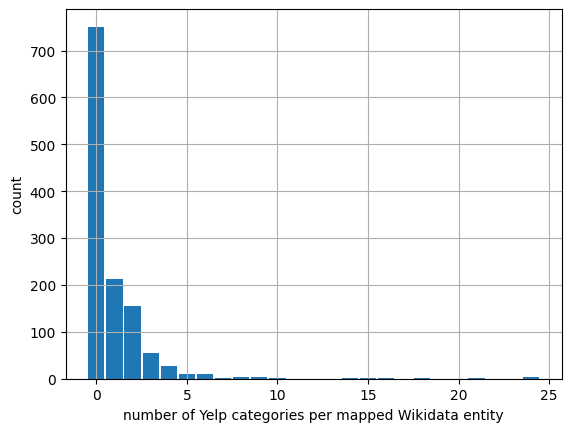

In [23]:
import matplotlib.pyplot as plt
data = yelp_wiki_category_mappings.groupby('schema_or_yelp_category').count().sort_values('qid', ascending=False)['subclassOf'].hist( bins=25, alpha=1, align='left', rwidth=0.9)
data.set_xlabel("number of Yelp categories per mapped Wikidata entity")
data.set_ylabel("count")

In [11]:
df['qid'].dropna().shape[0]

576